In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns


In [2]:
df = pd.read_csv("combined_ncaa_player_stats.csv")
df


,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,/cbb/players/lou-zykiewicz-1.html,Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,NaN,NaN,3.1,-4.16,NaN,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,NaN,1.7,7.0,-12.74,2.0,0
109658,/cbb/players/michal-zylinski-1.html,Michal Zylinski,1.5,0.333,0.5,0.0,NaN,0.0,2.0,6-4,0.5,1.5,-6.49,0.5,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,6-6,1.3,5.1,3.51,2.8,0


In [3]:
#convert height change nan to zero
df["height"]= df["height"].fillna('0-0')

In [4]:
#change height into inches 
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    df["height"] = df["height"].apply(parse_ht(ht))
print (df["height"].apply(lambda x:parse_ht(x)))

0         77.0
1         81.0
2         77.0
3         77.0
4         70.0
          ... 
109656     0.0
109657     0.0
109658    76.0
109659    78.0
109660    80.0
Name: height, Length: 109661, dtype: float64


In [5]:
df["height"] = df["height"].apply(lambda x:parse_ht(x))
df.head()

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [6]:
#replace nan with 0
df= df.fillna(0)

In [7]:
df.head(5)

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [8]:
train = df.iloc[:54831]
test = df.iloc[54831:]

In [9]:
train.head()

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [10]:
test.head()

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54831,/cbb/players/_-knurek-1.html,_ Knurek,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0,0
54832,/cbb/players/danny-knust-1.html,Danny Knust,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4,0
54833,/cbb/players/jay-knuth-1.html,Jay Knuth,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0,0
54834,/cbb/players/tom-knuth-1.html,Tom Knuth,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7,0
54835,/cbb/players/gabe-knutson-1.html,Gabe Knutson,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3,0


In [11]:
#Dropping Columns not needed
train = train.drop(columns=['url'])

test = test.drop(columns=['url'])

In [12]:
#Dropping Columns not needed
train_stats = train.drop(columns=['name'])

test_stats = test.drop(columns=['name'])

In [13]:
train.head(5)

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [14]:
test.head(5)

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54831,_ Knurek,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0,0
54832,Danny Knust,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4,0
54833,Jay Knuth,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0,0
54834,Tom Knuth,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7,0
54835,Gabe Knutson,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3,0


In [15]:
train_stats.head(5)

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [16]:
test_stats.head(5)

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54831,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0,0
54832,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4,0
54833,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0,0
54834,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7,0
54835,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3,0


In [17]:
feature_cols_pred_all = ['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']

In [18]:
X = train_stats[feature_cols_pred_all]
y = train_stats['is_pro']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [21]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[21045   205]
 [  473   210]]


In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9690876761045001
Precision: 0.5060240963855421
Recall: 0.3074670571010249


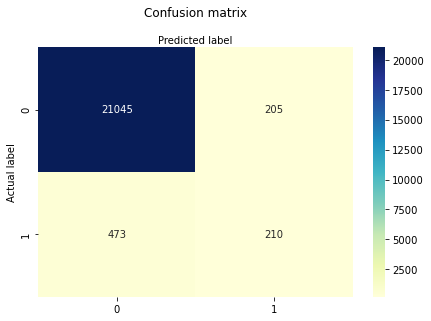

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

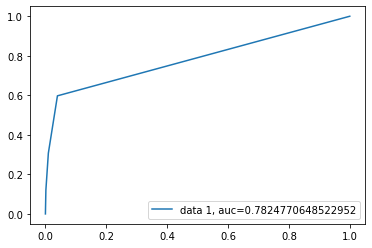

In [25]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
test

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54831,_ Knurek,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0,0
54832,Danny Knust,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4,0
54833,Jay Knuth,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0,0
54834,Tom Knuth,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7,0
54835,Gabe Knutson,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,0.0,0.0,3.1,-4.16,0.0,0
109657,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,0.0,1.7,7.0,-12.74,2.0,0
109658,Michal Zylinski,1.5,0.333,0.5,0.0,0.000,0.0,2.0,76.0,0.5,1.5,-6.49,0.5,0
109659,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,78.0,1.3,5.1,3.51,2.8,0


In [27]:
feature_cols_pred_all = ['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','ptspg','sospg','pfpg','trbpg']

In [28]:
X_pred = train[feature_cols_pred_all]

In [29]:
#set seed
random.seed(111)

In [30]:
Y_pred = knn.predict(X_pred)
y_series = pd.Series(Y_pred)
test['is_pro'] = y_series

In [31]:
results = test[test['is_pro'] == 1]
results.head(5)

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro


In [32]:
print(results)

Empty DataFrame
Columns: [name, fgapg, fgpct, fgpg, ftapg, ftpct, ftpg, games, height, pfpg, ptspg, sospg, trbpg, is_pro]
Index: []
